## Cleaning And Analyzing Employee Exit Surveys

We are using here exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project the aim is to do the most of the data cleaning and try to answer:

 - Are employees who only worked for the institutes for a short period of time resigning mainly due to some kind of dissatisfaction? What about employees who have been there longer?
 - Are younger employees resigning mainly due to some kind of dissatisfaction? What about older employees?



In [1]:
# Importing necessary libraries and reading csv files into variables
import pandas as pd
import numpy as np
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

__Exploring both datasets__

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


__There are already a few things that we will have to adjust:__
   - In dete_survey DF there are 'Not Stated' values instead NaN.
   - Both DFs contain a lot of information we don't need.
   - Both DFs have a few columns, which contain the same information, but their names are different.
   - There are several columns involving resignation, but each with different reasons of being dissatisfied.



In [4]:
# A column "DETE Start Date" in dete_survey file contains values "Not Stated", which we want as NaN
dete_survey = pd.read_csv("dete_survey.csv", na_values=["Not Stated"])
# We will get rid of some columns, which won't help us in our analysis. For now we just need columns with informations about age, length of employment, termination, reasons behind it and similar.
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [5]:
l1 = tafe_survey_updated.columns
l2 = dete_survey_updated.columns
print(l1, l2)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [6]:
# We will slightly change some of the columns' names
dete_survey_updated.columns = dete_survey_updated.columns.str.strip("").str.replace(" ","_"). str.lower()
tafe_survey_updated.rename(columns={'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'},inplace=True)

In [7]:
dete_survey_updated.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes


In [8]:
tafe_survey_updated.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


__For our basic analysis we need just those data from people who have resigned themself, so we will collect just those.__


In [9]:
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [10]:
tafe_survey_updated[tafe_survey_updated["separationtype"].isnull()]

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
324,6.345804e+17,Sunshine Coast Institute of TAFE,Non-Delivery (corporate),2011.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# This row doesn't contain almost any information, so we can drop it
tafe_survey_updated.drop(324, axis=0,inplace=True)

In [12]:
dete_survey_updated["separationtype"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
# Looking for those values which are matching word "Resignation"
match_1 = tafe_survey_updated["separationtype"].str.contains("Resignation")
match_2 = dete_survey_updated["separationtype"].str.contains("Resignation")

In [14]:
# Creating new dataframes just with resignation data
tafe_resignations = tafe_survey_updated[match_1].copy()
dete_resignations = dete_survey_updated[match_2].copy()

__Now we will look for logical inconsistencies in columns with start and resign year__

In [15]:
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [16]:
# We need just years, so we will get rid of months and "/"
dete_resignations["cease_date"] = dete_resignations["cease_date"].str[-4:].astype(float)

In [17]:
dete_resignations["cease_date"].value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

In [18]:
dete_resignations["dete_start_date"].value_counts(dropna=False)

NaN        28
 2011.0    24
 2008.0    22
 2007.0    21
 2012.0    21
 2010.0    17
 2005.0    15
 2004.0    14
 2009.0    13
 2006.0    13
 2013.0    10
 2000.0     9
 1999.0     8
 1998.0     6
 2002.0     6
 1994.0     6
 1996.0     6
 1992.0     6
 2003.0     6
 1980.0     5
 1990.0     5
 1993.0     5
 1997.0     5
 1989.0     4
 1995.0     4
 1988.0     4
 1991.0     4
 2001.0     3
 1986.0     3
 1985.0     3
 1976.0     2
 1983.0     2
 1974.0     2
 1963.0     1
 1972.0     1
 1984.0     1
 1975.0     1
 1973.0     1
 1987.0     1
 1982.0     1
 1971.0     1
 1977.0     1
Name: dete_start_date, dtype: int64

In [19]:
tafe_resignations["cease_date"].value_counts(dropna=False)

 2011.0    116
 2012.0     94
 2010.0     68
 2013.0     55
NaN          5
 2009.0      2
Name: cease_date, dtype: int64

__It looks like there aren't any ilogical outliers.__

In [20]:
# One DF is lacking a column with the length of time an employee spent in a workplace, so we will create it and fill it
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

__Now, we'll identify any employees who resigned because they were dissatisfied.__

__We will adjust values in two columns in "tafe_resignations" from originals to True, False, NaN so pandas will be able to Group them based on the dissatisfaction.__

In [21]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [22]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [23]:
# Creating a function, which will change the values
def update_vals(value):
    if pd.isnull(value):
        value = np.nan
    elif value == "-":
        value = False
    else:
        value = True
    return value
    

In [24]:
# Applying the function and changing values
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations["Contributing Factors. Job Dissatisfaction"] = tafe_resignations["Contributing Factors. Job Dissatisfaction"].apply(update_vals)

__Creating a new column "dissatisfied" in both DF, where we will group all those columns with different types of dissatifactions. So if at least one column contains the value True (that this column is the reason why they left) the value in the new column "dissatisfied" will be True as well, if all will be False the value will be False as well and if NaN, it will be NaN.__

In [25]:
tafe_resignations_up =tafe_resignations.copy()
tafe_resignations_up["dissatisfied"] = tafe_resignations[['Contributing Factors. Dissatisfaction', "Contributing Factors. Job Dissatisfaction"]].any(axis=1, skipna=False)

In [26]:
dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"] =  dete_resignations[["job_dissatisfaction", 
                  "dissatisfaction_with_the_department",
                  "physical_work_environment",
                  "lack_of_recognition",
                  "lack_of_job_security",
                  "work_location",
                  "employment_conditions",
                  "work_life_balance",
                  "workload"
]].any(axis=1, skipna=False)

In [27]:
# Adding a column to both dataframes, so we can distinguish between them.
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [28]:
# Combining DFs
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, sort=True)

In [29]:
# There are still columns we don't need for our analysis
combined.notnull().sum().sort_values()


torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
employment_conditions                                                        311
ill_health                  

In [30]:
# We will get rid of those which have less than 500 non null values
combined_updated = combined.dropna(axis=1, thresh=500).copy()

In [31]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


In [32]:
# We have to still clean "institute_service" column in some way.
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


__Logically there is a variety of different ages. So we will categorize them into a few groups.__


   - New: Less than 3 years at a company
   - Experienced: 3-6 years at a company
   - Established: 7-10 years at a company
   - Veteran: 11 or more years at a company


In [33]:
# We will create a function which will transfer each value in specified category
def cat_val(value):
    if pd.isnull(value):
        val = np.nan
    elif value<3:
        val = "New"
    elif value >= 3 and value <=6:
        val = "Experienced"
    elif value >= 7 and value <=10:
        val = "Established"
    else:
        val = "Veteran"
    return val

In [34]:
# Not all values are just numbers, so we will get rid of extra strings and ranges
up2 = combined_updated.copy()
up2["institute_service"] = combined_updated["institute_service"].astype(str)

In [35]:
up2["institute_service"] = up2["institute_service"].str.strip("s").str.strip("year ").str.split(" ").str[-1]
up2["institute_service"] = up2["institute_service"].str.split("-").str[-1]
up2["institute_service"] = up2["institute_service"].astype(float)

In [36]:
# Creating a new column "service_cat" where we will save categorized values from "institute_service" 
combined_updated["service_cat"] = up2["institute_service"].apply(cat_val)

In [37]:
# We will clean the "age" column as well.
combined_updated["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [38]:
combined_updated["age"] = combined_updated["age"].str.replace("  ","-").str.replace("56-60","56 or older").str.replace("61 or older","56 or older")

In [40]:
# Changing NaN value
combined_updated.loc[combined_updated["age"].isnull(), "age"] = "Not Specified" 

In [41]:
combined_updated["age"].value_counts(dropna=False)

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
Not Specified    55
20 or younger    10
Name: age, dtype: int64

### Now we will try to do an initial introduction analysis and answer above questions.

In [42]:
# Inspecting values in "dissatisfied"
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [43]:
# Majority of values are False and there are just a few of NaN values, so we will add them as False
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

In [44]:
# True values are treated as 1 in Python, so we can use pivot_table and figure out which group from "service_cat" (career stage) is the most dissatisfied when leaving
res_dis = combined_updated.pivot_table(index= "service_cat", values = "dissatisfied")
res_dis

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


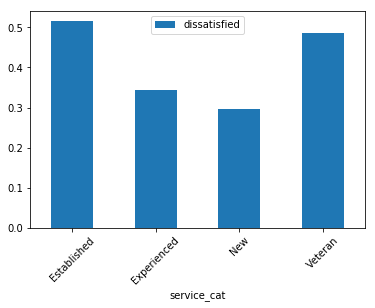

In [45]:
%matplotlib inline

res_dis.plot(kind="bar", rot=45)

__From above graph and a pivot table we can tell that those employees who work for the company 7 years and more are almost half ot the time resigning because being dissatisfied.__

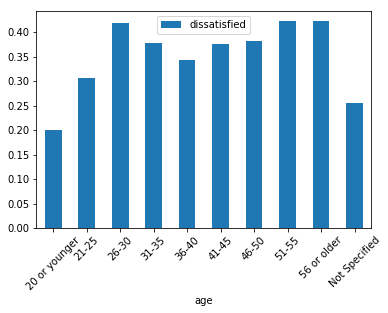

In [46]:
age_dis = combined_updated.pivot_table(index= "age", values = "dissatisfied")
age_dis.plot(kind='bar', rot=45)

__From age/dissatisfaction analysis and resulting graph, we can see that the employees who are mostly resigning because of dissatisfaction are from three age groups. 26-30,51-55 and 56 or older with liklyhood around 42%. So we cannot really conclude if younger or older people are more likely to resign because of not being satisfied at work. But we can say that at any age the reasons behind the resignation are slightly more then half time different than not being satisfied at work.__